In [86]:
import numpy as np
import pandas as pd

In [87]:
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv("Position_Salaries.csv")

In [89]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [90]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [91]:
x = df['Level'].values
y = df["Salary"].values

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [93]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train.reshape(-1,1))
x_test = sc.fit_transform(x_test.reshape(-1,1))

In [94]:
#linear regression
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x.reshape(-1,1), y.reshape(-1,1))

LinearRegression()

In [131]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
polynomial_regressor = PolynomialFeatures(degree = 4)
x_poynimial = polynomial_regressor.fit_transform(x.reshape(-1,1))
linear_regressor.fit(x_poynimial, y.reshape(-1,1))

LinearRegression()

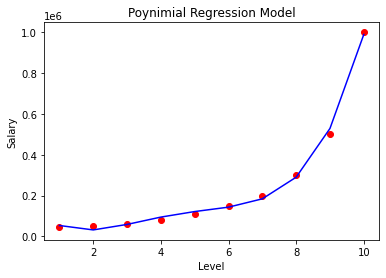

In [138]:
plt.scatter(x, y, c ='red')
plt.plot(x, linear_regressor.predict( polynomial_regressor.fit_transform(x.reshape(-1,1))), c = 'blue')
plt.title("Poynimial Regression Model")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [139]:
linear_regressor.predict(polynomial_regressor.fit_transform([[6]]))

array([[143275.05827517]])

In [140]:
linear_regressor.predict(polynomial_regressor.fit_transform([[9]]))

array([[528694.63869438]])

In [141]:
from sklearn.metrics import mean_squared_error
print("mean squared error: {}".format(mean_squared_error(y, linear_regressor.predict(polynomial_regressor.fit_transform(x.reshape(-1,1))))))

mean squared error: 210343822.84382465


In [142]:
from sklearn.metrics import mean_squared_error
print("root mean squared error: {}".format(np.sqrt(mean_squared_error(y, linear_regressor.predict(polynomial_regressor.fit_transform(x.reshape(-1,1)))))))

root mean squared error: 14503.234909627046
